# Aviation Accident Analysis

## Data Loading


In [ ]:
# Importing standard library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aviation-accident-data-2023-05-16.csv')
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


## Check and remove duplicated values

In [10]:
df[df.duplicated()].head(20)

,date,type,registration,operator,fatalities,location,country,cat,year
542,13-APR-1940,Junkers Ju-52/3m,NaN,German AF,NaN,"Gangsoya, Sogn o...",Norway,A1,1940
560,29-APR-1940,Junkers Ju-52/3m,NaN,German AF,0,Oslo-Fornebu Air...,Norway,A1,1940
568,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
577,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
579,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
580,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
581,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
582,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
584,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
585,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940


In [11]:
df.duplicated().value_counts()

False    23852
True       115
Name: count, dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().value_counts()

False    23852
Name: count, dtype: int64

#### Check for missing values

In [14]:
df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

### check the present values percentage

In [77]:
percentage_registration = 22419/23967 * 100
percentage_registration

93.54111903867818

In [78]:
percentage_operator = 23963/23967 * 100
percentage_operator

99.98331038511287

In [79]:
percentage_fatalities = 20029/23967 * 100
percentage_fatalities

83.56907414361415

In [80]:
percentage_location = 23019/23967 * 100
percentage_location

96.04456127174865

In [81]:
df['fatalities'].value_counts()

fatalities
0      14632
2       1140
1       1023
3        995
4        892
       ...  
134        1
256        1
290        1
259        1
224        1
Name: count, Length: 197, dtype: int64

In [82]:
# converting strings to numbers
def stringtonum(x):
    if pd.isna(x):
        return None
    x = str(x)
    if '+' in x:
        return int(x.split('+')[0])
    else:
        return int(float(x))

In [83]:
df['fatalities'] = df['fatalities'].apply(stringtonum)

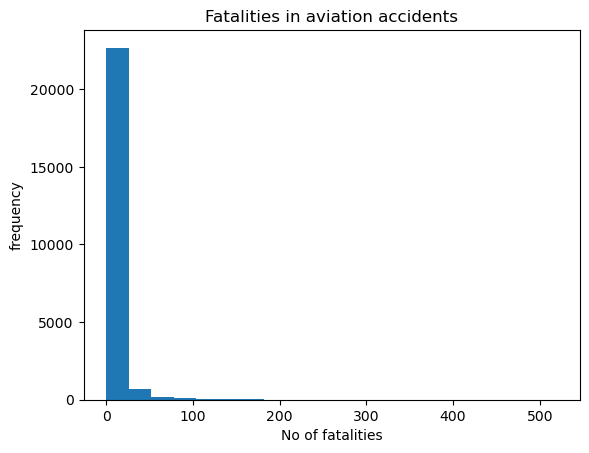

In [104]:
# fatalities histogram 
plt.hist(df['fatalities'], bins=20)
plt.title('Fatalities in aviation accidents')
plt.xlabel('No of fatalities')
plt.ylabel('frequency')
plt.show()

In [85]:
df['fatalities'].value_counts()

fatalities
0      14632
2       1140
1       1023
3        995
4        892
       ...  
134        1
256        1
290        1
259        1
224        1
Name: count, Length: 197, dtype: int64

In [86]:
fatalities_median = df['fatalities'].median()
fatalities_median

0.0

In [87]:
df['fatalities'] = df['fatalities'].fillna(fatalities_median)

In [88]:
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [89]:
df['registration'].value_counts()

registration
LZ-...     1447
-            11
unreg.        6
39            5
48            4
           ... 
52-5881       1
HJ250         1
11073         1
45-879        1
D-CGFQ        1
Name: count, Length: 21962, dtype: int64

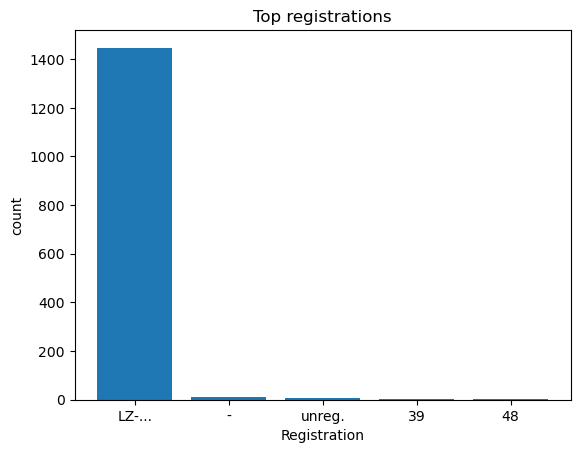

In [107]:
registration_count = df['registration'].value_counts().head()

plt.bar(registration_count.index, registration_count.values)
plt.xlabel('Registration')
plt.ylabel('count')
plt.title('Top registrations')
plt.show()


In [91]:
reg_mode = df['registration'].mode()[0]
reg_mode

'LZ-...'

In [92]:
df['registration'] = df['registration'].fillna(reg_mode)

In [93]:
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [94]:
df['location'].value_counts()

location
unknown                1204
Havana-JosÃ© Mar...     105
Miami Internatio...      71
Beirut Internati...      48
New York-John F....      44
                       ... 
near Damroh               1
Puerto Columbia           1
Moskva-Khodynka ...       1
near Byelaya Noch         1
Hohn Air Base             1
Name: count, Length: 14608, dtype: int64

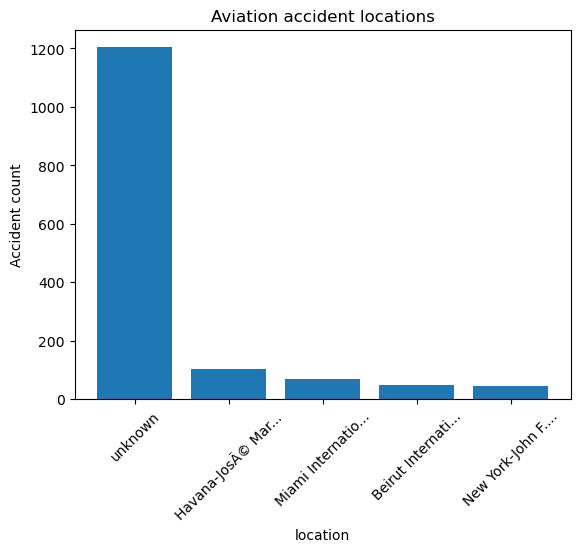

In [95]:
location_count = df['location'].value_counts().head()

plt.bar(location_count.index, location_count.values)
plt.title('Aviation accident locations')
plt.xlabel('location')
plt.ylabel('Accident count')
plt.xticks(rotation = 45)
plt.show()

In [96]:
location_mode = df['location'].mode()[0]
location_mode

'unknown'

In [97]:
df['location'] = df['location'].fillna(location_mode)

In [98]:
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [99]:
df['operator'].value_counts()

operator
USAAF                          2608
USAF                           1118
RAF                             920
US Navy                         745
German AF                       411
                               ... 
BAFIN                             1
Dow Chemical Company              1
Aero Bellavista                   1
Pacific Missionary Aviation       1
Bar Aviation                      1
Name: count, Length: 6017, dtype: int64

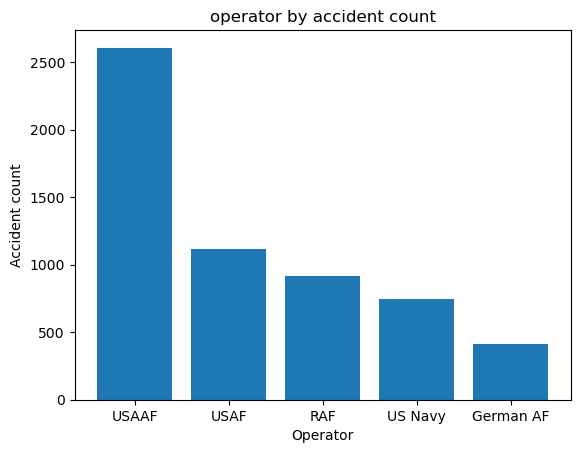

In [100]:
operator_count = df['operator'].value_counts().head()

plt.bar(operator_count.index, operator_count.values)
plt.title('operator by accident count')
plt.xlabel('Operator')
plt.ylabel('Accident count')
plt.show()

In [101]:
operator_mode = df['operator'].mode()[0]
operator_mode

'USAAF'

In [102]:
df['operator'] = df['operator'].fillna(operator_mode)

In [105]:
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [108]:
df.to_csv('clean-aviation-accident-data.csv', index=False)

# Data Analysis